##### Grading Feedback Cell

# IST 718: Big Data Analytics

- Professor: Willard Williamson <wewillia@syr.edu>
- Faculty Assistant: Yash Pasar
## General instructions:

- You are welcome to discuss the problems with your classmates but __you are not allowed to copy any part of your answers from your classmates.  Short code snippets are allowed from the internet.  Code from the class text books or class provided code can be copied in its entirety.__
- __Do not change homework file names.__ The FAs and the professor use these names to grade your homework.  Changing file names may result in a point reduction penalty.
- There could be tests in some cells (i.e., `assert` and `np.testing.` statements). These tests (if present) are used to grade your answers. **However, the professor and FAs could use __additional__ test for your answer. Think about cases where your code should run even if it passess all the tests you see.**
- Before submitting your work, remember to check for run time errors with the following procedure:
`Kernel`$\rightarrow$`Restart and Run All`.  All runtime errors will result in a minimum penalty of half off.
- Data Bricks is the official class runtime environment so you should test your code on Data Bricks before submission.  If there is a runtime problem in the grading environment, we will try your code on Data Bricks before making a final grading decision.
- All plots shall include a title, and axis labels.
- Grading feedback cells are there for graders to provide feedback to students.  Don't change or remove grading feedback cells.

In [1]:
import numpy as np
import random as r
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

**Question 1 (10 pts)** Write a function named reverse_by_three that receives a numpy array, python list, or tuple as an input argument and starting at the 2nd from last element, returns every 3rd element of the list in reverse order.  It is legal to return an empty python list, numpy array, or tuple if the input.  Use slicing syntax exclusively to perform the operations.  Your code should be efficient as possible and not use a lot of extraneous un-needed code in the solution.

In [2]:
#returning the array in reverse order with step 3 starting from second last element
def reverse_by_three(array):
    
    return array[-2::-3]

In [3]:
# For grading use only (question 1)
reverse_by_three(np.array([1,2,3,4,5,6]))

array([5, 2])

##### Grading Feedback Cell

**Question 2 (10 pts)** Create a python class named my_statistics.  The my_statisitics class should require a single numpy array argument in its constructor.  Implement the following statistical methods in the my_statistics class: get_mean, get_pop_std, get_sample_std, get_min, and get_max.  The get_pop_std method shall return the standard deviation assuming the constructor argument is a complete population.  The get_sample_std method shall return the standard deviation assuming that the constructor argument is a sample of a population.  The get_min and get_max methods shall return the min and max of the constructor argument respectively.  The get_mean method shall return the mean.  Return a 'None' type if the constructor argument would cause an error for the specified operation.  Use numpy functions to perform the statistical calculations.

In [4]:
#using numpy functions to perform statistical calculations
class my_statistics():
    
    def __init__(stat, array):
        
        stat.data = array
        
    def get_mean(stat):
            
            return np.mean(stat.data)

#std function in numpy calculates population standard deviation by default
    def get_pop_std(stat):
            
            return np.std(stat.data)

#setting delta degrees of freedom(ddof) parameter to 1 in std function calculates sample standard deviation
    def get_sample_std(stat):
            
            return np.std(stat.data, ddof = 1)
    
    def get_min(stat):
            
            return np.min(stat.data)
    
    def get_max(stat):
            
            return np.max(stat.data)

In [5]:
# For grading use only (question 2)
stats_data = np.array([12, 17, 9, 13, -5, -7, -9, -11, 39, 42, 17, 2, 99, 1, -310])
my_stats = my_statistics(stats_data)
print(my_stats.get_mean())
print(my_stats.get_pop_std())
print(my_stats.get_sample_std())
print(my_stats.get_min())
print(my_stats.get_max())

-6.066666666666666
85.59086140211205
88.59495847206355
-310
99


##### Grading Feedback Cell

**Question 3 (30 pts)** Create a function named monte_hall that takes as an argument the number of times to iterate a monte-carlo simulation of the Monte Hall problem with 4 doors and 1 prize.   (https://en.wikipedia.org/wiki/Monty_Hall_problem).   
For simplicity, you can assume that the game player always initially chooses door A and the host will open one door.  The prize may be behind any of the 4 doors.  The monte_hall function should print answers to the following 2 questions:  Based on the simulation, what is the probability of winning if you switch doors, and what is the probability of winning if you keep door A?  Your function should return these values in a tuple (prob_win_if_switch, prob_win_if_keep).

In [6]:
#monte carlo simulation of monty hall problem
def monte_hall(n):
    
    prob_win_if_switch = 0
    prob_win_if_keep = 0
    sum_win_if_keep = 0
    sum_win_if_switch = 0

#iterating monte carlo simulation n times
    for x in range(n):

#creating 4 doors where 1 represents the door with gift and shuffling them
        doors = [0, 0, 1, 0]
        r.shuffle(doors)
    
#assumimng that the player always chooses door A i.e., index 0 in doors
        door_selected = 0
    
#host opens the door with no gift behind
        non_gift_door = list()
        
        for i,val in enumerate(doors):
            if i != door_selected and val == 0:
                non_gift_door.append(i)
        
        door_opened = r.choice(non_gift_door)
    
#winning by staying at door A
        if doors[door_selected] == 1:
            sum_win_if_keep += 1

#switching to one of the two remaining doors
        door_remaining = [0, 1, 2, 3]
        door_remaining.remove(door_selected)
        door_remaining.remove(door_opened)
        
        door_switched = r.choice(door_remaining)

#winning by switching doors
        if doors[door_switched] == 1:
            sum_win_if_switch += 1

#calculating probability of winning
    prob_win_if_keep = sum_win_if_keep / n
    prob_win_if_switch = sum_win_if_switch / n
    
    return(prob_win_if_switch, prob_win_if_keep)

In [7]:
# For grading use only (question 3)
print(monte_hall(10000))

(0.3698, 0.2558)


##### Grading Feedback Cell

##### **Question 4 (10 pts)** Create a numpy array containing 10,000 samples of random normal data with a mean of 5 and a variance of 4.  Plot a histogram of the data using matplotlib.

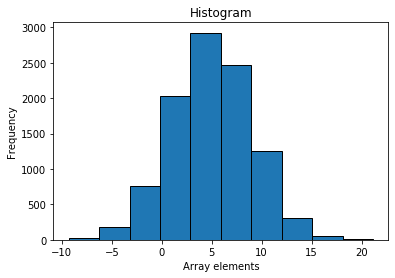

In [8]:
#creating a histogram for 10,000 random samples using matplotlib
sample_array = np.random.normal(5, 4, 10000)
plt.hist(sample_array, edgecolor = "black")
plt.title("Histogram")
plt.ylabel("Frequency")
plt.xlabel("Array elements")

plt.show()

##### Grading Feedback Cell

#### Question 5 (10 pts) The below cell creates a pandas dataframe called iris_df.  Write a function named plot_iris_grid that uses matplotlib to create a grid of 16 scatter plots of all combinatations of the columns in the iris_df data frame.  For example, the first row should be sepal len vs sepal len, sepal len vs sepal width, sepal len vs petal len, sepal len vs petal width.

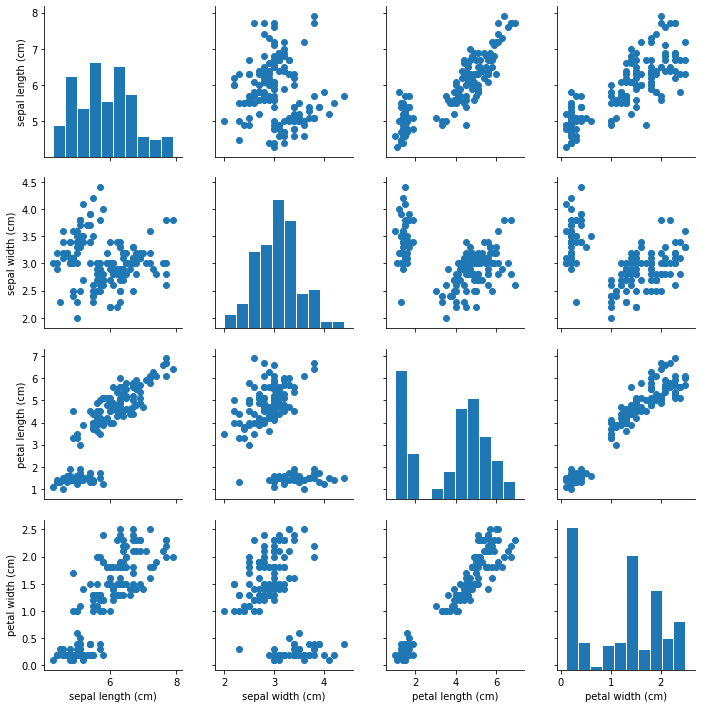

In [9]:
#creating grid of scatter plots for iris dataset using matplotliv and seaborn
def plot_iris_grid(iris_df):
    
    grid = sns.PairGrid(iris_df)
    grid.map_diag(plt.hist, edgecolor = "w")
    grid.map_offdiag(plt.scatter)

#loading iris dataframe from sklearn
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

plot_iris_grid(iris_df)

##### Grading Feedback Cell

#### Question 6 (20 pts) Pandas

6a (4 pts): Read the supplied potholes_2016.csv file into a pandas dataframe named potholes.  Save the shape of the potholes dataframe in a variable named potholes_shape.  Display the potholes_shape variable.  Display the head of the potholes dataframe.  

In [10]:
#reading potholes data from csv file
potholes = pd.read_csv('potholes_2016.csv')
potholes_shape = potholes.shape

print("Shape of the potholes dataframe:", potholes_shape)

potholes.head()

Shape of the potholes dataframe: (7488, 10)


,StreetNumber,StreetName,StreetNamePostType,Directional,strLocation,dtTime,streetID,VehicleName,Latitude,Longitude
0,215,COMSTOCK,AVE,,215 COMSTOCK AVE & HARRISON S,4/14/2016 8:57,12578124,DP2,-76.130140,43.044159
1,700,MIDLAND,AVE,,700-06 MIDLAND AVE & CASTLE ST W,4/15/2016 9:01,12573231,DP1,-76.154074,43.031314
2,1604,GRANT,BLVD,,1604-08 GRANT BLVD & WOODRUFF AVE,4/15/2016 13:03,12580306,DP1,-76.138284,43.072356
3,261,HOPPER,RD,,261 HOPPER RD,4/18/2016 10:39,12571704,DP2,-76.159681,42.998028
4,1821,VALLEY,DR,,1821 VALLEY DR & CHAFFEE AVE E,4/18/2016 10:52,12571710,DP2,-76.152482,42.997837


In [11]:
# for grading use only (question 6a)


##### Grading Feedback Cell

6b (4 pts): Count the total number of NAN values in the potholes dataframe and store in a variable named total_nan.  Print the total_nan variable.

In [12]:
#counting total number of NaN values
total_nan = potholes.isnull().sum().sum()

print("Total number of NaN values in the potholes dataframe:", total_nan)

#counting total number of blank values by considering single white space as NA value
potholes = pd.read_csv('potholes_2016.csv', na_values = ' ')
total_blank = potholes.isnull().sum().sum()

print("Total number of blank values in the potholes dataframe:", total_blank)

Total number of NaN values in the potholes dataframe: 0
Total number of blank values in the potholes dataframe: 5495


In [13]:
# for grading use only (question 6b)


##### Grading Feedback Cell

6c (4 pts): Count the number of unique street names in the dataframe and store in a variable named unique_street_name_count.  Print unique_street_name_count.

In [14]:
#counting number of unique street names
unique_street_name_count = len(potholes.StreetName.unique())

print("Number of unique street names in the dataframe:", unique_street_name_count)

Number of unique street names in the dataframe: 413


In [15]:
# for grading use only (question 6c)

##### Grading Feedback Cell

6d (4 pts): Use the pandas groupby feature to create a new dataframe called street_pothole_sum which summarizes the total number of potholes by street.  You are essentially counting the number of rows by street name.  The rows of street_pothole_sum should be the labeled with street name.  There should be a single column in street_pothole_sum dataframe named num_potholes.  Print the head and shape of the street_pothole_sum dataframe.

In [16]:
#creating a dataframe with total number of potholes in each street
street_pothole_sum = potholes.groupby('StreetName')[['StreetName']].count()
street_pothole_sum.columns = ['num_potholes']

print("Shape of the street_pothole_sum dataframe:", street_pothole_sum.shape)

street_pothole_sum.head()

Shape of the street_pothole_sum dataframe: (413, 1)


,num_potholes
StreetName,
ACADEMY,76
ACKERMAN,5
ADAMS,17
AINSLEY,7
ALANSON,4


In [17]:
# for grading use only (question 6d)

##### Grading Feedback Cell

6e (4 pts) Save the number of potholes on Comstock Ave in a variable named num_potholes_comstock and display the variable. The num_potholes_comstock variable should be an integer type.  Print num_potholes_comstock.

In [18]:
#number of potholes in comstock
num_potholes_comstock = street_pothole_sum.loc['COMSTOCK ', 'num_potholes']

print("Number of potholes on Comstock Ave:", num_potholes_comstock)

Number of potholes on Comstock Ave: 10


In [19]:
# for grading use only (question 6e)

##### Grading Feedback Cell

#### Question 7 (10 pts): Create a function named my_corr_coef that takes as input 2 numpy single dimensional arrays and returns the correlation coefficient to the caller.  Note that your function does not have to work for matrices.  The correlation coefficient is a number of type float between -1 and 1.  The my_corr_coef function should not use any built in numpy functions to calculate the correlation.  For example, don't use the built in numpy corrcoef function, don't use np.mean, etc.  Make sure to check for input error conditions and return the Python 'None' type if the correlation coefficient cannot be computed due to problems with the input data.  See [equation 3](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) as a reference on how to compute correlation.

In [20]:
#calculating correlation coefficient (i.e., covariance/(standard_deviation_x * standard_deviation_y))
def my_corr_coef(x, y):
    
    corr_coef = 0
    cov_xy = 0
    stdev_x = 0
    stdev_y = 0
    mean_x = 0
    mean_y = 0

#correlation can be calculated only if the two samples are of equal length
    if len(x) == len(y):

#mean of x        
        sum = 0
        for ele in x:
            sum += ele
        
        mean_x = sum / len(x)

#mean of y
        sum = 0
        for ele in y:
            sum += ele
        
        mean_y = sum / len(y)
        
#covariance of x and y
        sum = 0
        for i in range(len(x)):
            sum += (x[i] - mean_x) * (y[i] - mean_y)
        
        cov_xy = sum / (len(x) - 1)
    
#standard deviation of x
        sum = 0
        for ele in x:
            sum += (ele - mean_x) ** 2
        
        stdev_x = (sum / (len(x) - 1)) ** (1/2)
    
#standard deviation of y
        sum = 0
        for ele in y:
            sum += (ele - mean_y) ** 2
        
        stdev_y = (sum / (len(y) - 1)) ** (1/2)
    
#correlation coefficient of x and y
        corr_coef = cov_xy / (stdev_x * stdev_y)
        
        return corr_coef
    
    else:
        return 'None'

In [21]:
# for grading use only (question 7)
a = np.array([1,2,3,4,6,7,8,9])
b = np.array([2,4,6,8,10,12,13,15])
my_corr_coef(a,b)

0.9953500135553002

##### Grading Feedback Cell